In [43]:
import pandas as pd
import numpy as np
import datetime as dt

In [44]:
import matplotlib.pyplot as plt

In [45]:
edges = pd.read_csv('edges-new.csv')

In [46]:
edges.columns

Index(['stop_id', 'target_stop_id', 'trip_id', 'departure_time',
       'route_short_name', 'duration_to_next', 'stop_lat', 'stop_lon'],
      dtype='object')

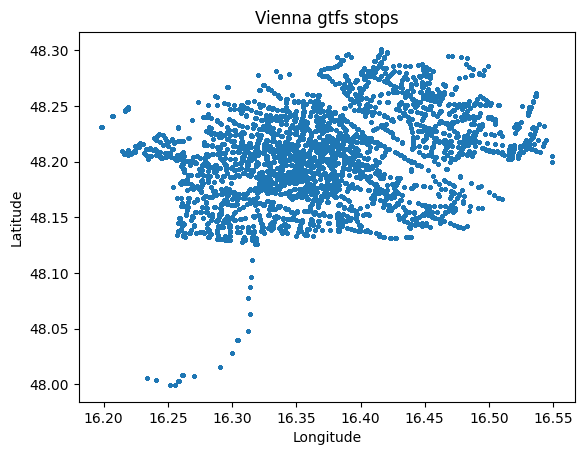

In [47]:
fig, ax = plt.subplots()
ax.scatter(x = edges.stop_lon, y= edges.stop_lat, s = 3)
plt.title('Vienna gtfs stops')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(16.30, 16.35)
# plt.ylim(48.20, 48.10)
plt.show()

#### checking for a single tram line : 41

In [48]:
trips = edges.groupby('route_short_name')

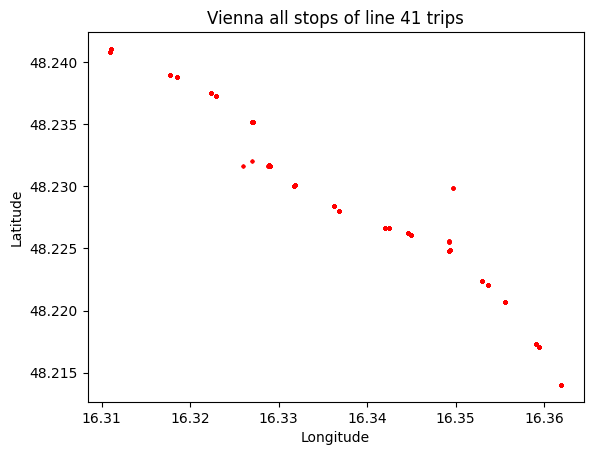

In [49]:
fig, ax = plt.subplots()
# ax.plot(trips41.stop_lon, trips41.stop_lat)
ax.scatter(x = trips41.stop_lon, y= trips41.stop_lat, s = 3, color = 'red', zorder = 3)
plt.title('Vienna all stops of line 41 trips')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.xlim(16.30, 16.35)
# plt.ylim(48.20, 48.10)
plt.show()

In [50]:
trips41 = trips.get_group('41')

In [51]:
trips41_exp = trips41.drop(columns=['trip_id', 'departure_time'])
trips41_exp.to_csv("41_all_trips.csv", index=False)

In [52]:
trips41_selected = trips41[(trips41['stop_id'] == 'at:49:1056:0:5') & (trips41['target_stop_id'] == 'at:49:1202:0:4')]

In [53]:
print('checking if all are same')
for column in trips41_selected.columns:
    print(column, '   :   ', len(trips41_selected[column].unique()))

checking if all are same
stop_id    :    1
target_stop_id    :    1
trip_id    :    472
departure_time    :    332
route_short_name    :    1
duration_to_next    :    2
stop_lat    :    1
stop_lon    :    1


In [82]:
trips41_grouped = trips41.groupby(['stop_id', 'target_stop_id'])
condensed41 = pd.DataFrame([], columns = ['stop_id', 'target_stop_id', 'duration'])
len(trips41_grouped)


33

In [77]:
#try with aggregate
trips41_grouped.agg({'duration_to_next':'mean'})

,,duration_to_next
stop_id,target_stop_id,
at:49:101:0:1,at:49:843:0:1,120.000000
at:49:101:0:3,at:49:1461:0:3,82.807775
at:49:1056:0:3,at:49:1056:0:5,41.313559
at:49:1056:0:5,at:49:1202:0:4,108.559322
at:49:1184:0:2,at:49:1197:0:2,120.000000
at:49:1197:0:2,at:49:1288:0:2,125.442478
at:49:1197:0:4,at:49:1184:0:2,120.000000
at:49:1202:0:2,at:49:1056:0:3,86.440678
at:49:1202:0:4,at:49:287:0:4,69.406780


In [71]:
stopsome = trips41_grouped.get_group(('at:49:1056:0:5', 'at:49:1202:0:4'))
print(len(stopsome))
#funguje

472


In [55]:
#musime mergovat vsetky edges s rovnakym start end, zobrat mean duration and save all departure times in a list

#### by start stop node uniqueness

stops = edges.